In [1]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())

2.6.0+cu124
CUDA available: True


In [2]:
import os
import shutil
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = '/content/drive/MyDrive'

dataset_dir = os.path.join(base_dir, 'DL_Project/dataset/rice_plant_lacks_nutrients')
split_dir = os.path.join(base_dir, 'dataset_split')
train_dir = os.path.join(split_dir, 'train')
val_dir = os.path.join(split_dir, 'val')

def prepare_dataset():
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(val_dir, exist_ok=True)

    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
            train_imgs, val_imgs = train_test_split(images, test_size=0.2, random_state=42)

            os.makedirs(os.path.join(train_dir, class_name), exist_ok=True)
            os.makedirs(os.path.join(val_dir, class_name), exist_ok=True)

            for img in train_imgs:
                shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, class_name, img))
            for img in val_imgs:
                shutil.copy(os.path.join(class_path, img), os.path.join(val_dir, class_name, img))

    print("✅ Dataset split complete!")

prepare_dataset()


✅ Dataset split complete!


In [ ]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print("✅ Data loaded!")
print("Classes:", train_dataset.classes)

✅ Data loaded!
Classes: ['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)']


In [ ]:
inception_transform = transforms.Compose([
    transforms.Resize((299, 299)),  
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

inception_train_dataset = datasets.ImageFolder(train_dir, transform=inception_transform)
inception_val_dataset = datasets.ImageFolder(val_dir, transform=inception_transform)

inception_train_loader = DataLoader(inception_train_dataset, batch_size=32, shuffle=True)
inception_val_loader = DataLoader(inception_val_dataset, batch_size=32, shuffle=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from tqdm import tqdm

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ModifiedDenseNet169(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedDenseNet169, self).__init__()
        self.model = models.densenet169(weights=models.DenseNet169_Weights.IMAGENET1K_V1)

        self.model.classifier = nn.Sequential(
            nn.Linear(self.model.classifier.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.model(x)

densenet169_model = ModifiedDenseNet169(num_classes=3).to(device)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 145MB/s]


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ModifiedDenseNet201(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedDenseNet201, self).__init__()
        self.model = models.densenet201(weights=models.DenseNet201_Weights.IMAGENET1K_V1)

        self.model.classifier = nn.Sequential(
            nn.Linear(self.model.classifier.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.model(x)

densenet201_model = ModifiedDenseNet201().to(device)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth
100%|██████████| 77.4M/77.4M [00:00<00:00, 134MB/s]


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ModifiedInceptionV3(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedInceptionV3, self).__init__()
        self.model = models.inception_v3(weights=models.Inception_V3_Weights.IMAGENET1K_V1, aux_logits=True)

        self.model.fc = nn.Sequential(
            nn.Linear(self.model.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.model(x)

inceptionv3_model = ModifiedInceptionV3().to(device)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 142MB/s]


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ModifiedResNet50V2(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedResNet50V2, self).__init__()
        self.model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)  
        self.model.fc = nn.Sequential(
            nn.Linear(self.model.fc.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.model(x)

resnet50v2_model = ModifiedResNet50V2().to(device)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 150MB/s]


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class ModifiedDenseNet121(nn.Module):
    def __init__(self, num_classes=3):
        super(ModifiedDenseNet121, self).__init__()
        self.model = models.densenet121(weights=models.DenseNet121_Weights.IMAGENET1K_V1)  
        self.model.classifier = nn.Sequential(
            nn.Linear(self.model.classifier.in_features, 512),
            nn.ReLU(),
            nn.Dropout(0.25),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        return self.model(x)

densenet121_model = ModifiedDenseNet121().to(device)

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 129MB/s]


In [12]:
def train_model(model, train_loader, val_loader, epochs=50, lr=0.0001, is_inception=False):
    print(f'Using {model.__class__.__name__} for training')
    print('----------------------------')

    model = model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        running_loss, correct, total = 0.0, 0, 0

        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{epochs}"):
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()

            if is_inception:
                outputs, aux_outputs = model(images)
                loss1 = criterion(outputs, labels)
                loss2 = criterion(aux_outputs, labels)
                loss = loss1 + 0.4 * loss2
            else:
                outputs = model(images)
                loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

        train_acc = correct / total
        val_acc = evaluate_model(model, val_loader)

        print(f"Epoch {epoch + 1}/{epochs} | Loss: {running_loss / len(train_loader):.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    print()
    return model


In [13]:
def evaluate_model(model, val_loader):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            correct += (outputs.argmax(1) == labels).sum().item()
            total += labels.size(0)

    return correct / total

In [ ]:
TRAIN_MODELS = True
if TRAIN_MODELS:
    densenet169_model = train_model(densenet169_model, train_loader, val_loader, epochs=5)
    torch.save(densenet169_model.state_dict(), "densenet169_model.pth")

    densenet201_model = train_model(densenet201_model, train_loader, val_loader, epochs=5)
    torch.save(densenet201_model.state_dict(), "densenet201_model.pth")

    inceptionv3_model = train_model(inceptionv3_model, inception_train_loader, inception_val_loader, epochs=5, is_inception=True)
    torch.save(inceptionv3_model.state_dict(), "inceptionv3_model.pth")

    resnet50v2_model = train_model(resnet50v2_model, train_loader, val_loader, epochs=5)
    torch.save(resnet50v2_model.state_dict(), "resnet50v2_model.pth")

    densenet121_model = train_model(densenet121_model, train_loader, val_loader, epochs=5)
    torch.save(densenet121_model.state_dict(), "densenet121_model.pth")

else:
    densenet169_model.load_state_dict(torch.load("densenet169_model.pth"))
    densenet201_model.load_state_dict(torch.load("densenet201_model.pth"))
    inceptionv3_model.load_state_dict(torch.load("inceptionv3_model.pth"))
    resnet50v2_model.load_state_dict(torch.load("resnet50v2_model.pth"))
    densenet121_model.load_state_dict(torch.load("densenet121_model.pth"))


Using ModifiedDenseNet169 for training
----------------------------


Epoch 1/5: 100%|██████████| 28/28 [00:41<00:00,  1.47s/it]


Epoch 1/5 | Loss: 0.0279 | Train Acc: 0.9943 | Val Acc: 0.9591


Epoch 2/5: 100%|██████████| 28/28 [00:43<00:00,  1.56s/it]


Epoch 2/5 | Loss: 0.0102 | Train Acc: 0.9977 | Val Acc: 0.9636


Epoch 3/5: 100%|██████████| 28/28 [00:40<00:00,  1.46s/it]


Epoch 3/5 | Loss: 0.0040 | Train Acc: 0.9977 | Val Acc: 0.9727


Epoch 4/5: 100%|██████████| 28/28 [00:41<00:00,  1.46s/it]


Epoch 4/5 | Loss: 0.0014 | Train Acc: 1.0000 | Val Acc: 0.9773


Epoch 5/5: 100%|██████████| 28/28 [00:41<00:00,  1.47s/it]


Epoch 5/5 | Loss: 0.0006 | Train Acc: 1.0000 | Val Acc: 0.9773

Using ModifiedDenseNet201 for training
----------------------------


Epoch 1/5: 100%|██████████| 28/28 [00:44<00:00,  1.60s/it]


Epoch 1/5 | Loss: 0.0051 | Train Acc: 0.9989 | Val Acc: 0.9864


Epoch 2/5: 100%|██████████| 28/28 [00:43<00:00,  1.56s/it]


Epoch 2/5 | Loss: 0.0187 | Train Acc: 0.9966 | Val Acc: 0.9636


Epoch 3/5: 100%|██████████| 28/28 [00:44<00:00,  1.57s/it]


Epoch 3/5 | Loss: 0.0144 | Train Acc: 0.9954 | Val Acc: 0.9864


Epoch 4/5: 100%|██████████| 28/28 [00:43<00:00,  1.56s/it]


Epoch 4/5 | Loss: 0.0044 | Train Acc: 0.9977 | Val Acc: 0.9864


Epoch 5/5: 100%|██████████| 28/28 [00:44<00:00,  1.60s/it]


Epoch 5/5 | Loss: 0.0056 | Train Acc: 0.9966 | Val Acc: 0.9136

Using ModifiedInceptionV3 for training
----------------------------


Epoch 1/5: 100%|██████████| 28/28 [00:44<00:00,  1.60s/it]


Epoch 1/5 | Loss: 0.0800 | Train Acc: 0.9818 | Val Acc: 0.9636


Epoch 2/5: 100%|██████████| 28/28 [00:45<00:00,  1.63s/it]


Epoch 2/5 | Loss: 0.0611 | Train Acc: 0.9863 | Val Acc: 0.9773


Epoch 3/5: 100%|██████████| 28/28 [00:45<00:00,  1.62s/it]


Epoch 3/5 | Loss: 0.0229 | Train Acc: 0.9954 | Val Acc: 0.9682


Epoch 4/5: 100%|██████████| 28/28 [00:46<00:00,  1.65s/it]


Epoch 4/5 | Loss: 0.0285 | Train Acc: 0.9932 | Val Acc: 0.9727


Epoch 5/5: 100%|██████████| 28/28 [00:44<00:00,  1.59s/it]


Epoch 5/5 | Loss: 0.0441 | Train Acc: 0.9932 | Val Acc: 0.9545

Using ModifiedResNet50V2 for training
----------------------------


Epoch 1/5: 100%|██████████| 28/28 [00:39<00:00,  1.42s/it]


Epoch 1/5 | Loss: 0.8307 | Train Acc: 0.6378 | Val Acc: 0.8227


Epoch 2/5: 100%|██████████| 28/28 [00:39<00:00,  1.40s/it]


Epoch 2/5 | Loss: 0.2374 | Train Acc: 0.9385 | Val Acc: 0.9318


Epoch 3/5: 100%|██████████| 28/28 [00:40<00:00,  1.44s/it]


Epoch 3/5 | Loss: 0.0616 | Train Acc: 0.9841 | Val Acc: 0.9500


Epoch 4/5: 100%|██████████| 28/28 [00:39<00:00,  1.42s/it]


Epoch 4/5 | Loss: 0.0281 | Train Acc: 0.9954 | Val Acc: 0.9636


Epoch 5/5: 100%|██████████| 28/28 [00:39<00:00,  1.41s/it]


Epoch 5/5 | Loss: 0.0082 | Train Acc: 1.0000 | Val Acc: 0.9636

Using ModifiedDenseNet121 for training
----------------------------


Epoch 1/5: 100%|██████████| 28/28 [00:39<00:00,  1.42s/it]


Epoch 1/5 | Loss: 0.6635 | Train Acc: 0.7733 | Val Acc: 0.9318


Epoch 2/5: 100%|██████████| 28/28 [00:40<00:00,  1.45s/it]


Epoch 2/5 | Loss: 0.1350 | Train Acc: 0.9636 | Val Acc: 0.9727


Epoch 3/5: 100%|██████████| 28/28 [00:40<00:00,  1.44s/it]


Epoch 3/5 | Loss: 0.0428 | Train Acc: 0.9920 | Val Acc: 0.9682


Epoch 4/5: 100%|██████████| 28/28 [00:39<00:00,  1.41s/it]


Epoch 4/5 | Loss: 0.0393 | Train Acc: 0.9897 | Val Acc: 0.9682


Epoch 5/5: 100%|██████████| 28/28 [00:39<00:00,  1.41s/it]


Epoch 5/5 | Loss: 0.0180 | Train Acc: 0.9989 | Val Acc: 0.9727



✅ ResNet50V2 - Validation Accuracy: 0.9636
✅ DenseNet121 - Validation Accuracy: 0.9727
✅ DenseNet201 - Validation Accuracy: 0.9136
✅ DenseNet169 - Validation Accuracy: 0.9773
✅ InceptionV3 - Validation Accuracy: 0.9455


<ipython-input-17-c4b65579a45e>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=val_accuracies, y=model_names, palette="viridis")
<ipython-input-17-c4b65579a45e>:47: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


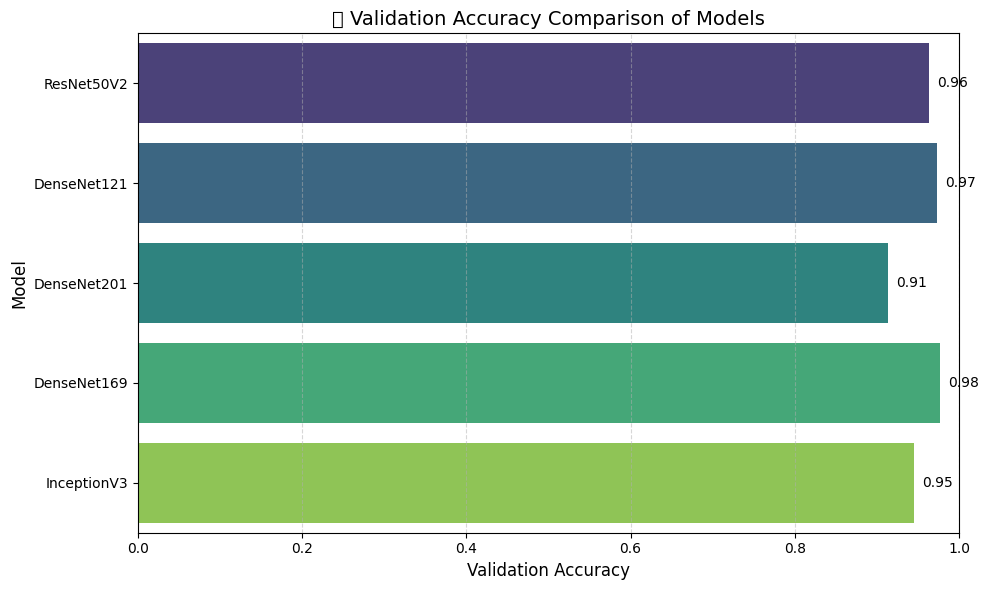

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

trained_models = [
    ('ResNet50V2', resnet50v2_model),
    ('DenseNet121', densenet121_model),
    ('DenseNet201', densenet201_model),
    ('DenseNet169', densenet169_model),
    ('InceptionV3', inceptionv3_model)
]


def collect_validation_accuracies(models, val_loader):
    model_names = []
    val_accuracies = []

    for name, model in models:
        model.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.cuda(), labels.cuda()
                outputs = model(images)
                correct += (outputs.argmax(1) == labels).sum().item()
                total += labels.size(0)

        acc = correct / total
        model_names.append(name)
        val_accuracies.append(acc)
        print(f"✅ {name} - Validation Accuracy: {acc:.4f}")

    return model_names, val_accuracies
model_names, val_accuracies = collect_validation_accuracies(trained_models, val_loader)


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=val_accuracies, y=model_names, palette="viridis")
plt.xlabel("Validation Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("📊 Validation Accuracy Comparison of Models", fontsize=14)
plt.xlim(0, 1)
for index, value in enumerate(val_accuracies):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontsize=10)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


In [ ]:
import torch.nn.functional as F

def evaluate_ensemble(models, weights, val_loader):
    assert len(models) == len(weights), "Each model must have a corresponding weight"

    for model in models:
        model.eval()

    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            batch_size = images.size(0)
            images = images.to(device)
            labels = labels.to(device)

            ensemble_probs = torch.zeros((batch_size, 3)).to(device)  

            for i, (model, weight) in enumerate(zip(models, weights)):
                if isinstance(model, ModifiedInceptionV3):
                    # Resize images to 299x299 for Inception
                    images_resized = torch.nn.functional.interpolate(images, size=(299, 299), mode='bilinear', align_corners=False)
                    outputs = model(images_resized)
                    if isinstance(outputs, tuple):
                        outputs = outputs[0]
                else:
                    outputs = model(images)

                probs = F.softmax(outputs, dim=1)
                ensemble_probs += weight * probs

            preds = ensemble_probs.argmax(dim=1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    accuracy = correct / total
    print(f"✅ Ensemble Accuracy: {accuracy:.4f}")
    return accuracy
models = [resnet50v2_model, densenet121_model, densenet201_model, densenet169_model, inceptionv3_model]

weights = [0.2, 0.2, 0.2, 0.2, 0.2]  

ensemble_accuracy = evaluate_ensemble(models, weights, val_loader)


✅ Ensemble Accuracy: 0.9682


✅ ResNet50V2 - Accuracy: 0.9636, Precision: 0.9639, Recall: 0.9610, F1-Score: 0.9621
✅ DenseNet121 - Accuracy: 0.9727, Precision: 0.9736, Recall: 0.9723, F1-Score: 0.9728
✅ DenseNet201 - Accuracy: 0.9136, Precision: 0.9164, Recall: 0.9173, F1-Score: 0.9128
✅ DenseNet169 - Accuracy: 0.9773, Precision: 0.9758, Recall: 0.9766, F1-Score: 0.9762
✅ InceptionV3 - Accuracy: 0.9455, Precision: 0.9451, Recall: 0.9432, F1-Score: 0.9438


<ipython-input-26-e4e3a044cf6d>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_values, y=model_names, palette="viridis")
<ipython-input-26-e4e3a044cf6d>:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


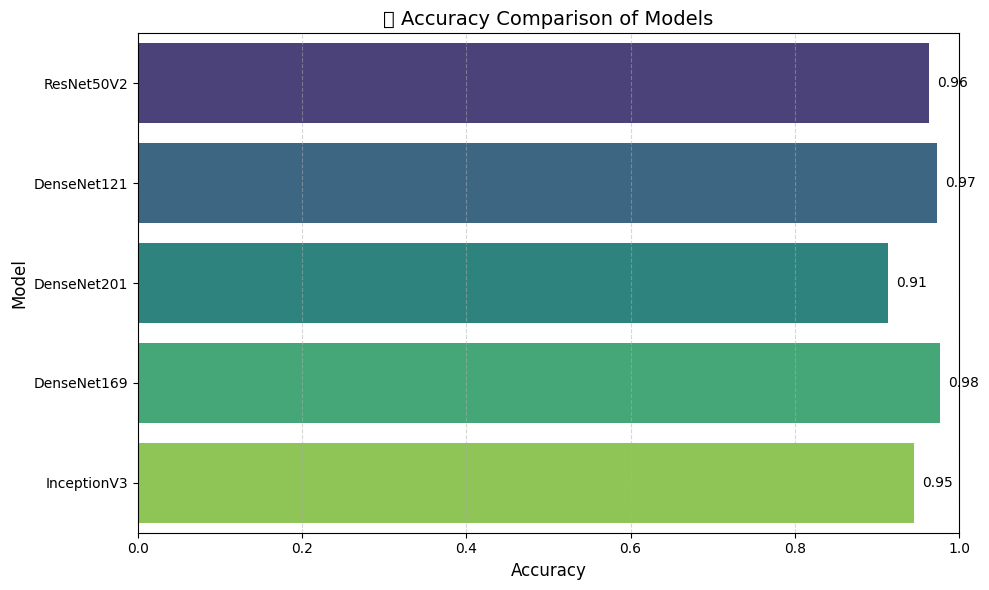

<ipython-input-26-e4e3a044cf6d>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_values, y=model_names, palette="viridis")
<ipython-input-26-e4e3a044cf6d>:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


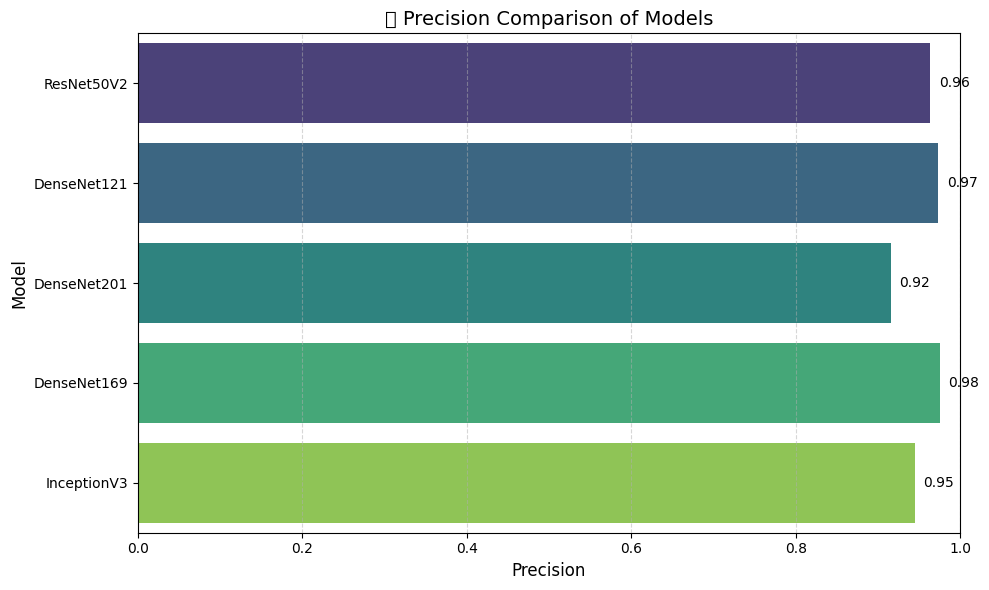

<ipython-input-26-e4e3a044cf6d>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_values, y=model_names, palette="viridis")
<ipython-input-26-e4e3a044cf6d>:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


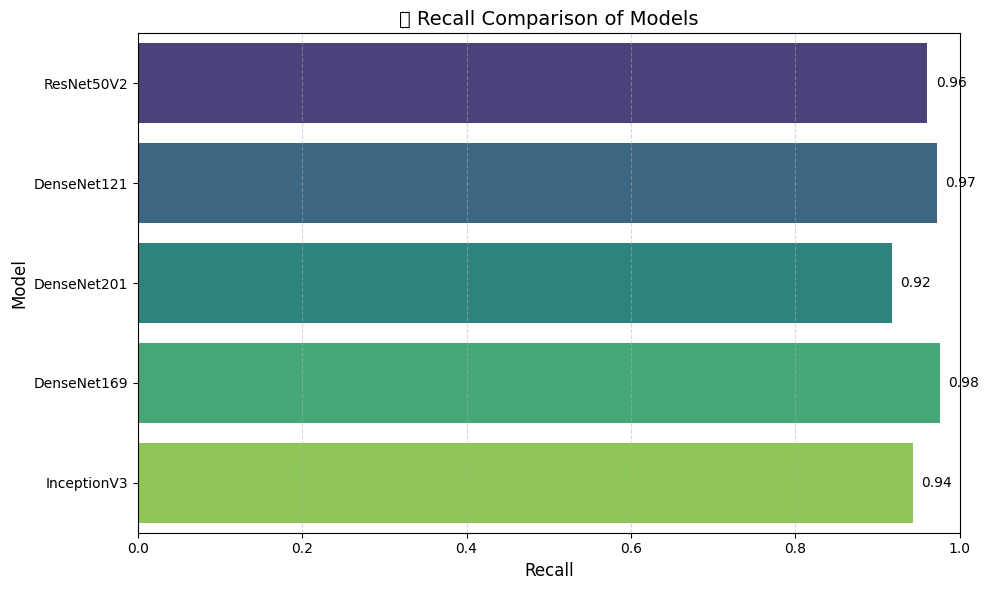

<ipython-input-26-e4e3a044cf6d>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metric_values, y=model_names, palette="viridis")
<ipython-input-26-e4e3a044cf6d>:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


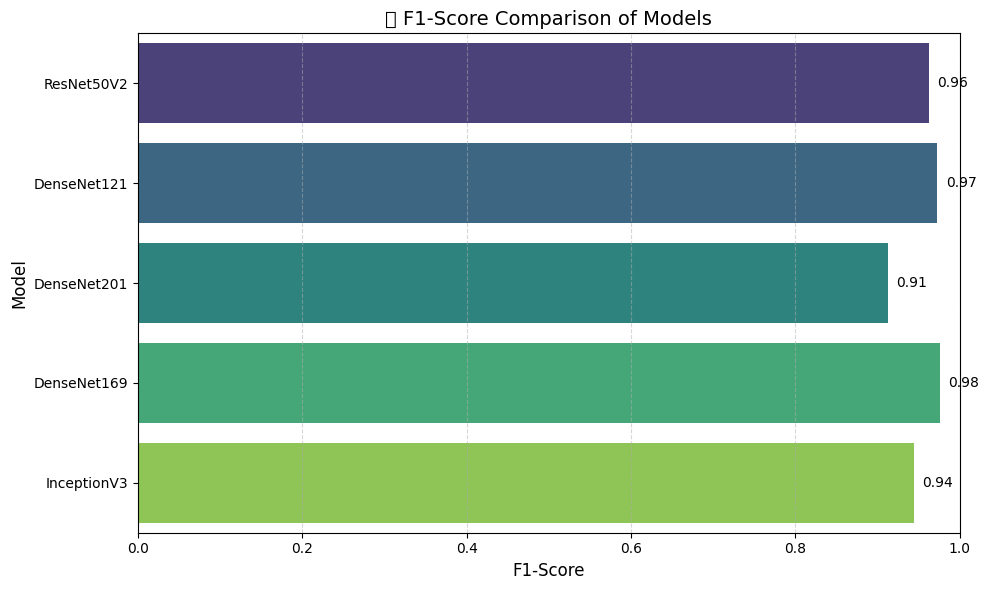

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
import torch
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Function to collect accuracy, precision, recall, and F1-score
def collect_and_plot_metrics(models, val_loader):
    model_names = []
    val_accuracies = []
    val_precisions = []
    val_recalls = []
    val_f1_scores = []

    for name, model in models:
        model.eval()
        all_preds = []
        all_labels = []

        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.cuda(), labels.cuda()
                outputs = model(images)
                preds = outputs.argmax(1)

                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = sum(np.array(all_preds) == np.array(all_labels)) / len(all_labels)

        precision = precision_score(all_labels, all_preds, average='macro')
        recall = recall_score(all_labels, all_preds, average='macro')
        f1 = f1_score(all_labels, all_preds, average='macro')

        model_names.append(name)
        val_accuracies.append(acc)
        val_precisions.append(precision)
        val_recalls.append(recall)
        val_f1_scores.append(f1)

        print(f"✅ {name} - Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

    metrics = {
        'Accuracy': val_accuracies,
        'Precision': val_precisions,
        'Recall': val_recalls,
        'F1-Score': val_f1_scores
    }

    for metric_name, metric_values in metrics.items():
        plt.figure(figsize=(10, 6))
        sns.barplot(x=metric_values, y=model_names, palette="viridis")
        plt.xlabel(f"{metric_name}", fontsize=12)
        plt.ylabel("Model", fontsize=12)
        plt.title(f"📊 {metric_name} Comparison of Models", fontsize=14)
        plt.xlim(0, 1)
        for index, value in enumerate(metric_values):
            plt.text(value + 0.01, index, f"{value:.2f}", va='center', fontsize=10)
        plt.tight_layout()
        plt.grid(axis='x', linestyle='--', alpha=0.5)
        plt.show()


model_names, val_accuracies, val_precisions, val_recalls, val_f1_scores = collect_and_plot_metrics(
    trained_models, val_loader
)


In [ ]:
import torch.nn.functional as F
from PIL import Image
from torchvision import transforms

def predict_single_model(model, image_tensor):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.unsqueeze(0).to(device)  
        output = model(image_tensor)
        probs = F.softmax(output, dim=1)
    return probs.squeeze().cpu().numpy()

def load_image(image_path, for_inception=False):
    if for_inception:
        transform = transforms.Compose([
            transforms.Resize((299, 299)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])
    else:
        transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406],
                                 [0.229, 0.224, 0.225])
        ])
    img = Image.open(image_path).convert('RGB')
    return transform(img)

def ensemble_predict(image_path, weights):
    image_224 = load_image(image_path, for_inception=False)
    image_299 = load_image(image_path, for_inception=True)

    models_with_weights = [
        (resnet50v2_model, weights[0]),
        (densenet121_model, weights[1]),
        (densenet201_model, weights[2]),
        (densenet169_model, weights[3]),
        (inceptionv3_model, weights[4])
    ]

    final_probs = torch.zeros(3)
    for i, (model, weight) in enumerate(models_with_weights):
        img_tensor = image_299 if isinstance(model, ModifiedInceptionV3) else image_224
        probs = torch.tensor(predict_single_model(model, img_tensor))
        final_probs += weight * probs

    predicted_class = final_probs.argmax().item()
    return predicted_class, final_probs

weights = [0.2, 0.2, 0.2, 0.2, 0.2]
class_names = ["Nitrogen", "Phosphorus", "Potassium"]
# image_path = "/content/drive/MyDrive/dataset_split/val/Potassium(K)/untitled.JPG"
image_path = "test_image2.jpg"
predicted_class, final_probs = ensemble_predict(image_path, weights)

print(f"Predicted class: {predicted_class}")
print(f"Predicted class name: {class_names[predicted_class]}")
print(f"Probabilities: {final_probs}")

Predicted class: 2
Predicted class name: Potassium
Probabilities: tensor([0.0027, 0.0091, 0.9882])


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from PIL import Image
import numpy as np
import cv2
import random

expanded_data = [
    ['Nitrogen', 'Low', 'Karnataka', 'Red', 'Kharif', 'Urea 20kg + Compost', 1],
    ['Nitrogen', 'Medium', 'TamilNadu', 'Black', 'Rabi', 'Urea 30kg split', 1],
    ['Nitrogen', 'High', 'Punjab', 'Alluvial', 'Rabi', 'Precision fertigation', 1],
    ['Nitrogen', 'Low', 'Maharashtra', 'Black', 'Rabi', 'Urea 10kg + FYM', 1],
    ['Nitrogen', 'Medium', 'Kerala', 'Laterite', 'Kharif', 'Cow dung slurry', 1],
    ['Nitrogen', 'Low', 'Karnataka', 'Red', 'Rabi', 'Compost only', 0],
    ['Potassium', 'Low', 'Kerala', 'Laterite', 'Kharif', 'Wood ash', 1],
    ['Potassium', 'Medium', 'TamilNadu', 'Red', 'Rabi', 'MOP 15kg', 1],
    ['Potassium', 'High', 'Punjab', 'Alluvial', 'Rabi', 'MOP + FYM', 1],
    ['Potassium', 'Low', 'Karnataka', 'Black', 'Kharif', 'Wood ash', 0],
    ['Potassium', 'Medium', 'Maharashtra', 'Red', 'Kharif', 'Potash Spray', 1],
    ['Potassium', 'High', 'Kerala', 'Laterite', 'Rabi', 'Banana compost', 0],
    ['Phosphorus', 'Medium', 'Karnataka', 'Red', 'Kharif', 'DAP 20kg', 1],
    ['Phosphorus', 'High', 'Maharashtra', 'Black', 'Rabi', 'Bone meal', 1],
    ['Phosphorus', 'Low', 'TamilNadu', 'Laterite', 'Kharif', 'Rock phosphate', 1],
    ['Phosphorus', 'Low', 'Kerala', 'Laterite', 'Rabi', 'DAP + Compost', 0],
    ['Phosphorus', 'High', 'Punjab', 'Alluvial', 'Kharif', 'DAP foliar spray', 1],
    ['Nitrogen', 'Low', 'Karnataka', 'Black', 'Rabi', 'Urea + Vermicompost', 1],
    ['Potassium', 'Medium', 'TamilNadu', 'Red', 'Kharif', 'Wood ash', 1],
    ['Phosphorus', 'Medium', 'Kerala', 'Laterite', 'Rabi', 'DAP 10kg', 0],
    ['Nitrogen', 'Low', 'AndhraPradesh', 'Sandy', 'Kharif', 'Urea 15kg', 1],
    ['Phosphorus', 'Medium', 'Rajasthan', 'Sandy', 'Rabi', 'Bone meal', 1],
    ['Potassium', 'High', 'UttarPradesh', 'Clay', 'Kharif', 'Wood ash', 1],
    ['Potassium', 'Low', 'Bihar', 'Loamy', 'Rabi', 'MOP 10kg', 0],
    ['Nitrogen', 'High', 'Gujarat', 'Black', 'Kharif', 'Urea 25kg split', 1],
    ['Phosphorus', 'Low', 'Haryana', 'Alluvial', 'Rabi', 'Rock phosphate', 0],
    ['Potassium', 'Medium', 'Assam', 'Silt', 'Kharif', 'Potash foliar', 1],
    ['Nitrogen', 'Medium', 'WestBengal', 'Clay', 'Rabi', 'Compost only', 0],
    ['Phosphorus', 'High', 'Odisha', 'Laterite', 'Kharif', 'DAP foliar', 1],
    ['Nitrogen', 'Low', 'TamilNadu', 'Red', 'Kharif', 'Urea 20kg + Compost', 1],
    ['Nitrogen', 'Low', 'TamilNadu', 'Red', 'Kharif', 'Urea 20kg + Compost', 0],
    ['Phosphorus', 'Low', 'Kerala', 'Red', 'Rabi', 'DAP 20kg', 1],
    ['Phosphorus', 'Low', 'Kerala', 'Red', 'Rabi', 'DAP 20kg', 0],
    ['Potassium', 'Medium', 'Kerala', 'Laterite', 'Kharif', 'Wood ash', 1],
    ['Potassium', 'Medium', 'Kerala', 'Laterite', 'Kharif', 'Wood ash', 0],
]

df = pd.DataFrame(expanded_data, columns=['Deficiency', 'Income', 'Region', 'Soil_Type', 'Season', 'Remedy', 'Success'])

encoders = {}
for col in df.columns[:-1]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

X = df.drop('Success', axis=1)
y = df['Success']

clf = DecisionTreeClassifier()
clf.fit(X, y)

def recommend_remedy(deficiency, income, region, soil_type, season, remedy_options):
    recommendations = []
    for remedy in remedy_options:
        test_df = pd.DataFrame([[deficiency, income, region, soil_type, season, remedy]],
                               columns=['Deficiency', 'Income', 'Region', 'Soil_Type', 'Season', 'Remedy'])

        for col in test_df.columns:
            if col in encoders:
                test_df[col] = encoders[col].transform(test_df[col])
            else:
                print(f"⚠️ Warning: No encoder found for column {col}")

        prediction = clf.predict(test_df)
        if prediction[0] == 1:
            recommendations.append(remedy)
    
    random.shuffle(recommendations)
    return recommendations[:5]

image_path = "test_image2.jpg"

predicted_class, final_probs = ensemble_predict(image_path, weights)
predicted_deficiency = class_names[predicted_class]

print(f"\n📷 Predicted Deficiency: {predicted_deficiency}")
print(f"🧠 Class Probabilities: {final_probs.tolist()}")

farmer_data = {
    'income': 'Low',
    'region': 'Karnataka',
    'soil_type': 'Red',
    'season': 'Kharif'
}

remedy_options = [
    'Urea 20kg + Compost', 'Urea 30kg split', 'Precision fertigation',
    'Urea 10kg + FYM', 'Cow dung slurry', 'Compost only',
    'Urea + Vermicompost', 'Urea 15kg', 'Urea 25kg split',
    'Wood ash', 'MOP 15kg', 'MOP + FYM', 'Potash Spray',
    'Banana compost', 'Potash foliar', 'MOP 10kg',
    'DAP 20kg', 'DAP + Compost', 'DAP foliar spray', 'Bone meal',
    'Rock phosphate', 'DAP 10kg', 'DAP foliar'
]

recommended = recommend_remedy(predicted_deficiency, farmer_data['income'], farmer_data['region'],
                               farmer_data['soil_type'], farmer_data['season'], remedy_options)

print(f"\n🌾 Recommended Remedies for {predicted_deficiency} Deficiency:")
for r in recommended:
    print(f" - {r}")



📷 Predicted Deficiency: Potassium
🧠 Class Probabilities: [0.0027133990079164505, 0.009061194024980068, 0.9882254600524902]

🌾 Recommended Remedies for Potassium Deficiency:
 - DAP 10kg
 - MOP 10kg
 - Urea 10kg + FYM
 - DAP foliar
 - MOP + FYM
